<a href="https://colab.research.google.com/github/DimpiTiwary/Python_tutorial/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#/content/car_prediction_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dimpi = pd.read_csv("https://raw.githubusercontent.com/DimpiTiwary/Python_tutorial/main/data/car_prediction_data.csv") 

### To describe the first few records of the data.

In [4]:
dimpi.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


### To define the last few records of the data

In [5]:
dimpi.tail(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
299,city,2017,11.5,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.3,5.9,5464,Petrol,Dealer,Manual,0


### To describe the bar plots(statistics ) of the data

<BarContainer object of 301 artists>

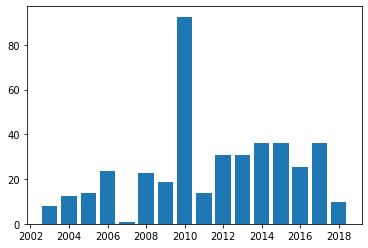

In [6]:
plt.bar(dimpi["Year"],dimpi["Present_Price"])

<BarContainer object of 301 artists>

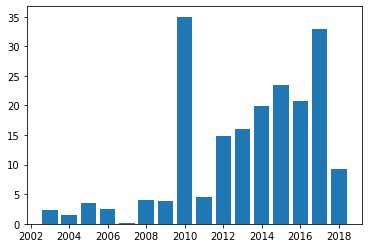

In [7]:
plt.bar(dimpi["Year"],dimpi["Selling_Price"])

### to decribe the columns of dataframe

In [8]:
dimpi.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### To get number of rows and columns from dataframe

In [9]:
dimpi.shape
print(dimpi["Seller_Type"].unique())
print(dimpi["Fuel_Type"].unique())
print(dimpi["Owner"].unique())
print(dimpi["Transmission"].unique())



['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
['Manual' 'Automatic']


### To find null values in the given data

In [10]:
dimpi.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### To get the statistics overview of the data

In [11]:
dimpi.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Filtering features

In [12]:
final_dataset = dimpi[["Year" , "Selling_Price" , "Present_Price"  , "Kms_Driven" , "Fuel_Type" , "Seller_Type" , "Transmission" , "Owner"]]
print(final_dataset.head())

   Year  Selling_Price  Present_Price  ...  Seller_Type Transmission Owner
0  2014           3.35           5.59  ...       Dealer       Manual     0
1  2013           4.75           9.54  ...       Dealer       Manual     0
2  2017           7.25           9.85  ...       Dealer       Manual     0
3  2011           2.85           4.15  ...       Dealer       Manual     0
4  2014           4.60           6.87  ...       Dealer       Manual     0

[5 rows x 8 columns]


In [13]:
final_dataset["Current_Year"] = 2021
print(final_dataset.head())

   Year  Selling_Price  Present_Price  ...  Transmission Owner Current_Year
0  2014           3.35           5.59  ...        Manual     0         2021
1  2013           4.75           9.54  ...        Manual     0         2021
2  2017           7.25           9.85  ...        Manual     0         2021
3  2011           2.85           4.15  ...        Manual     0         2021
4  2014           4.60           6.87  ...        Manual     0         2021

[5 rows x 9 columns]


In [14]:
final_dataset["no_of_years"] = final_dataset["Current_Year"]- final_dataset["Year"]

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


### the drop() method removes the specified row or column, By specifying the column axis ( axis='columns' ), the drop() method removes the specified column. By specifying the row axis ( axis='index' ), the drop() method removes the specified row.

### When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.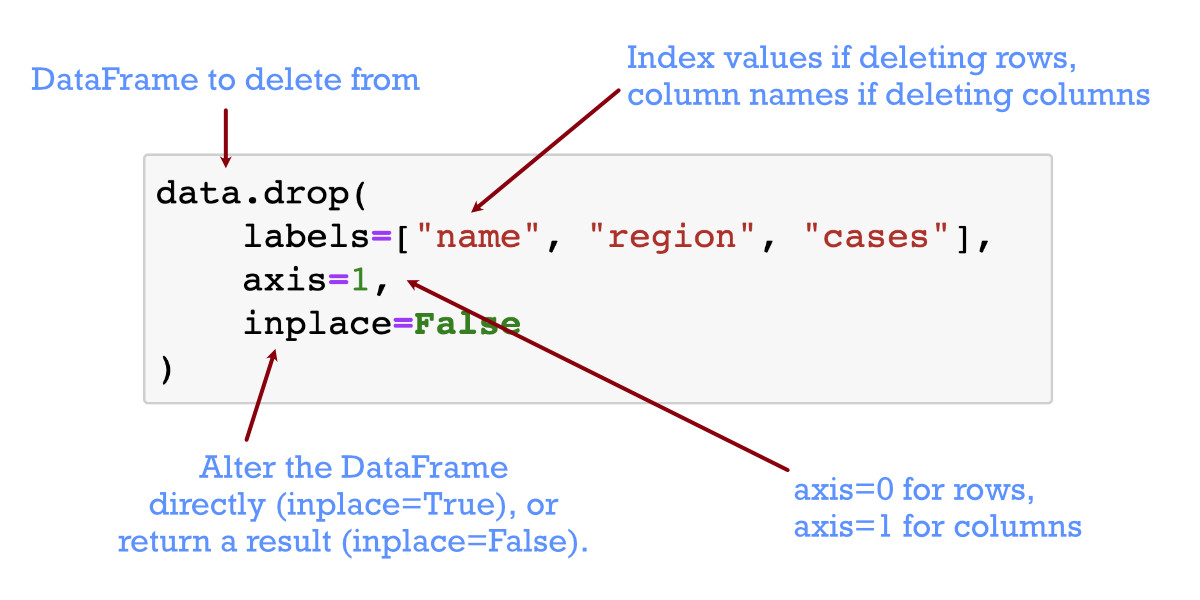

In [16]:
final_dataset.drop(["Year"] ,axis=1, inplace = True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
final_dataset["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [19]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True )
final_dataset.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [20]:
#s = pd.Series(np.random.randn(5), name='something')
#import pandas as pd
 
# initialize list of lists
#data = [['Tom', 10], ['nick', 15], ['juli', 14], ['Tom' , 13] , ['Tom', 18]]
 
# Create the pandas DataFrame
#df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
# print dataframe.
#df

In [21]:
#pd.get_dummies(df)

In [22]:
final_dataset = final_dataset.drop(["Current_Year"], axis =1)

In [23]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


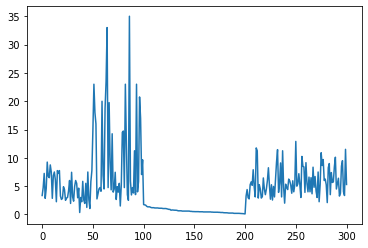

In [24]:
final_dataset["Selling_Price"].plot()

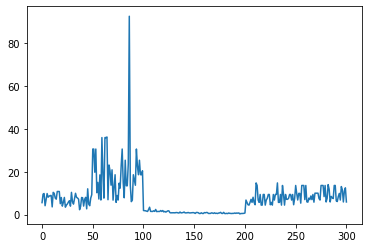

In [25]:
final_dataset["Present_Price"].plot()

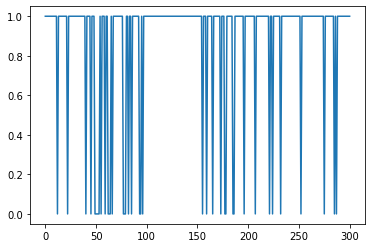

In [26]:
final_dataset["Transmission_Manual"].plot()

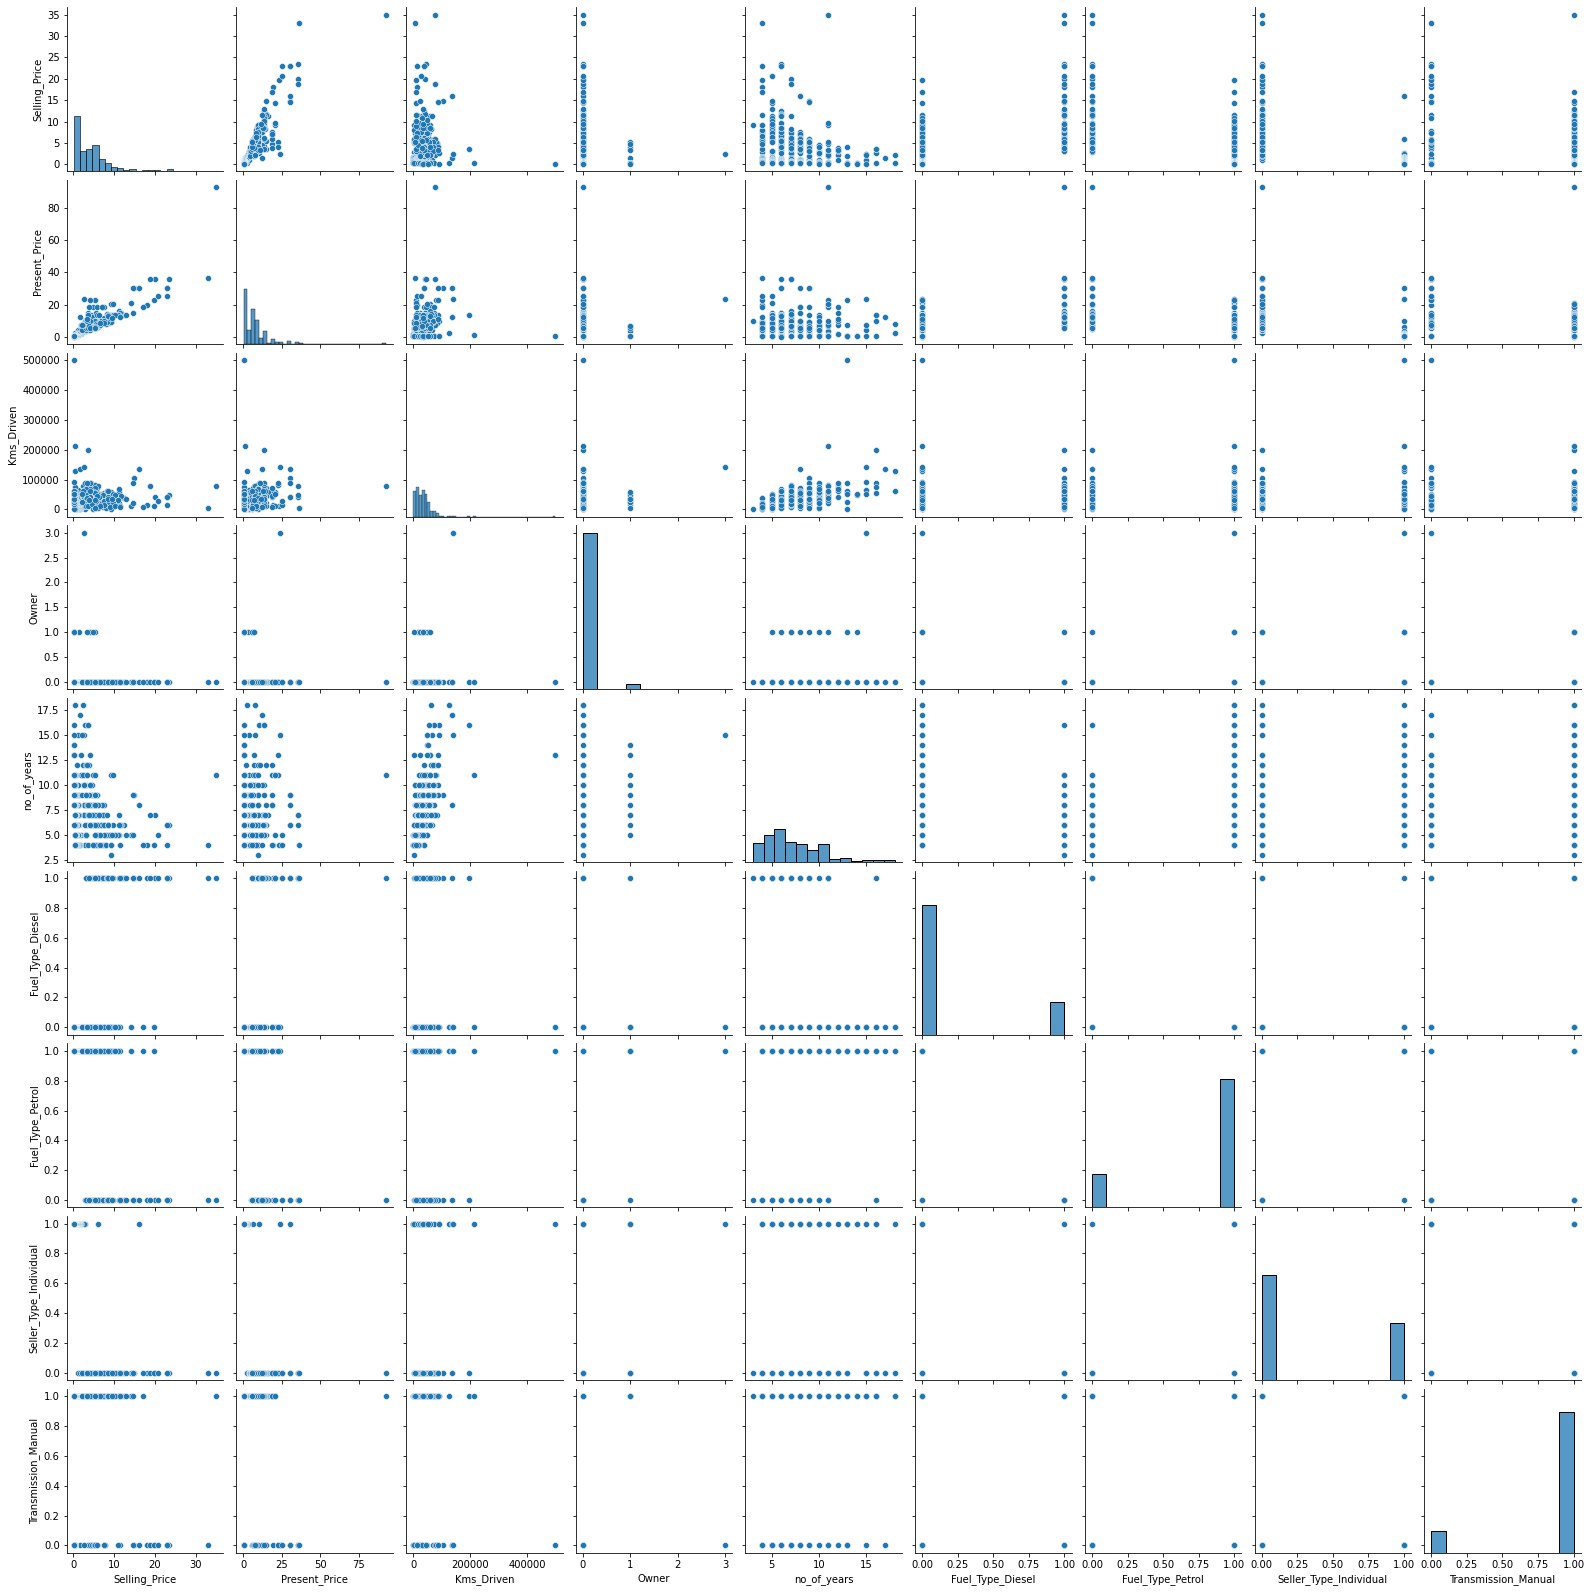

In [27]:
import seaborn as sns
sns.pairplot(final_dataset)

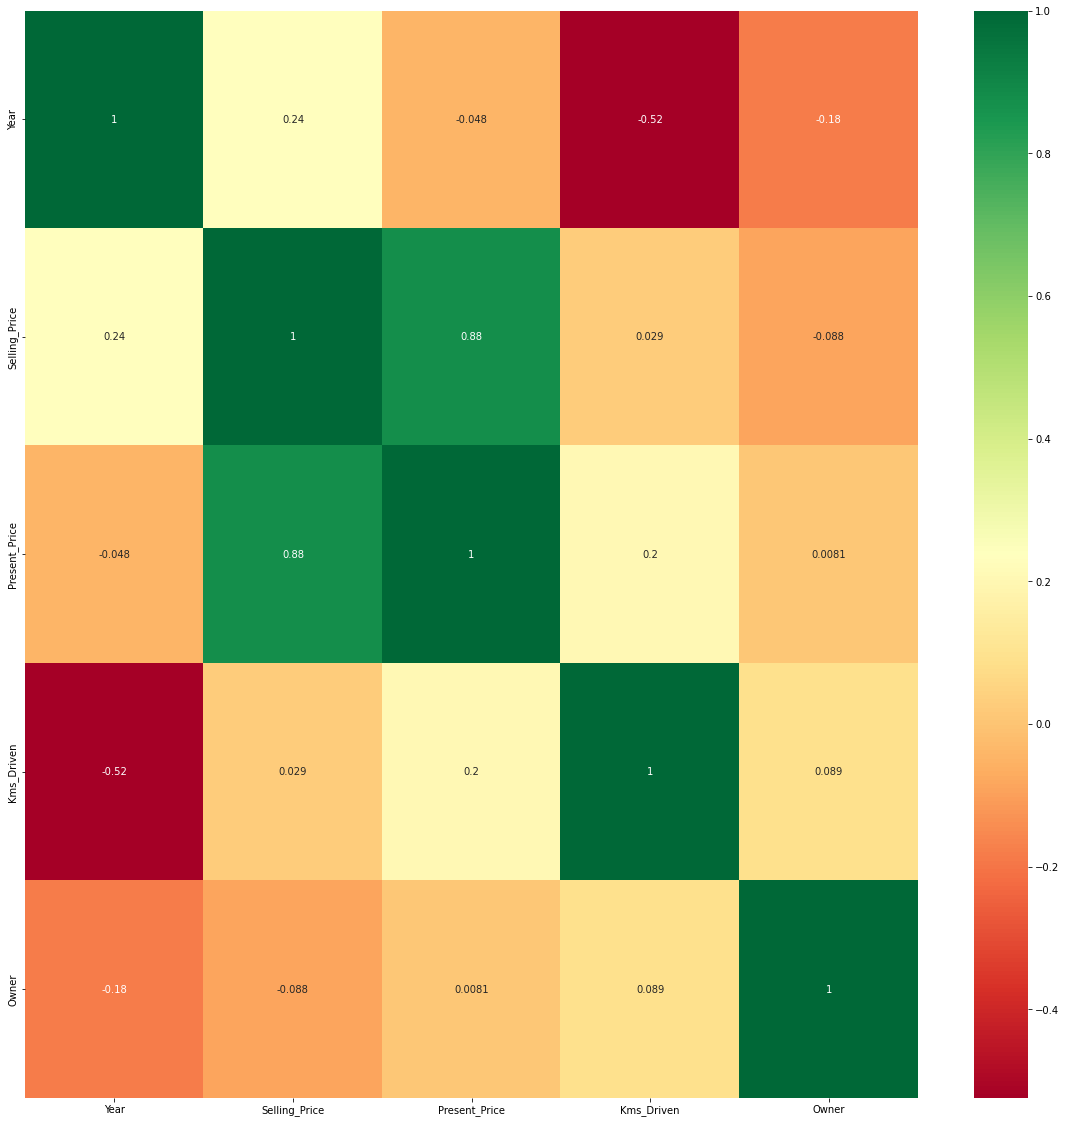

In [28]:
corrmat = dimpi.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(dimpi[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [31]:
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

Y

In [32]:
#final_dataset.iloc[:, :]


,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [80]:
final_dataset.tail(31)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
270,4.10,10.00,69341,0,10,0,1,0,1
271,3.00,10.00,69562,0,12,0,1,0,1
272,7.50,10.00,27600,0,6,0,1,0,1
273,2.25,7.50,61203,0,11,0,1,0,1
274,5.30,6.80,16500,0,7,0,1,0,1
275,10.90,13.60,30753,0,5,0,1,0,0
276,8.65,13.60,24800,0,6,0,1,0,1
277,9.70,13.60,21780,0,6,0,1,0,1
278,6.00,8.40,4000,0,5,0,1,0,1
279,6.25,13.60,40126,0,7,0,1,0,1


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1 , shuffle = False )


In [82]:
X.shape, x_train.shape, x_test.shape

((301, 8), (270, 8), (31, 8))

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [84]:
model.score(x_train,y_train)

0.8813049751949095

In [85]:
y_pred = model.predict(x_test)

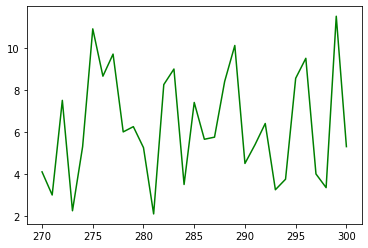

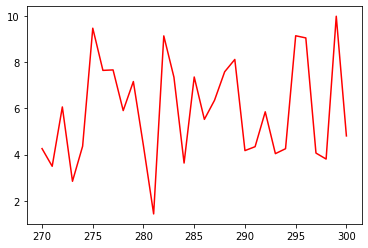

In [88]:
plt.plot(y_test.index , y_test, label = "actual" , color = "green" )
plt.show()
plt.plot(y_test.index , y_pred, label = "predicted" , color = "red" )

In [89]:
y_test.values

array([ 4.1 ,  3.  ,  7.5 ,  2.25,  5.3 , 10.9 ,  8.65,  9.7 ,  6.  ,
        6.25,  5.25,  2.1 ,  8.25,  8.99,  3.5 ,  7.4 ,  5.65,  5.75,
        8.4 , 10.11,  4.5 ,  5.4 ,  6.4 ,  3.25,  3.75,  8.55,  9.5 ,
        4.  ,  3.35, 11.5 ,  5.3 ])

In [90]:
len(y_pred) , len(y_test)

(31, 31)

In [91]:
y_pred

array([4.25791196, 3.49369227, 6.05926854, 2.8450457 , 4.3621019 ,
       9.46442632, 7.64055372, 7.66051086, 5.90203492, 7.1578949 ,
       4.366234  , 1.4339575 , 9.13169156, 7.34488786, 3.63430259,
       7.3541964 , 5.52262195, 6.34745917, 7.57975712, 8.11326039,
       4.17193866, 4.3409648 , 5.84916832, 4.04023325, 4.25293898,
       9.13735739, 9.04431696, 4.06532391, 3.8063902 , 9.98152087,
       4.80709515])